In [25]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [3]:
unemployment = pd.read_csv("unemployment.csv")
primary = pd.read_csv("primary_results.csv")
facts = pd.read_csv("state_facts.csv")
#Link to all the data: https://drive.google.com/drive/folders/1hPOBj6RMRBDPX-xzkam07DLX8sofY9uw?usp=sharing

# Preprocessing

In [4]:
#dictionary = sum of unemployment rate for each state
unemployment.head()

dictionary = {}
print((unemployment[unemployment["State"] == "Mississippi"]).index)

for i in range(len(unemployment["State"])):
    if unemployment['State'][i] not in dictionary:
        dictionary[unemployment['State'][i]] = unemployment['Rate'][i]
    else:
        dictionary[unemployment['State'][i]] = dictionary[unemployment['State'][i]] + unemployment['Rate'][i]

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            883242, 883243, 883244, 883245, 883246, 883247, 883248, 883249,
            883250, 883251],
           dtype='int64', length=26568)


In [5]:
#state is the count of each state (for calculating average unemployment rate)
states = {}

#python how to save dictionary as string and write into file

for i in range(len(unemployment["State"])):
    if unemployment['State'][i] not in states:
        states[unemployment['State'][i]] = 1
    else:
        states[unemployment['State'][i]] = states[unemployment['State'][i]] + 1

In [6]:
#unemployment_rate is the average unemployment rate of each state
unemployment_rate = {}
for i in states:
    unemployment_rate[i] = (dictionary[i]/states[i]) 
    

In [8]:
rate = pd.DataFrame([unemployment_rate]).transpose()
rate.columns=['unemployment']

print(rate)

                unemployment
Alabama             7.723844
Arizona             9.274588
Arkansas            6.782210
California          9.045005
Colorado            5.358946
Connecticut         5.548534
Delaware            5.041049
Hawaii              5.730401
Idaho               6.319992
Illinois            6.548596
Indiana             5.922725
Iowa                4.236744
Kansas              4.178851
Kentucky            7.238306
Louisiana           7.812949
Maine               6.263985
Maryland            5.866422
Massachusetts       5.673611
Michigan            8.136136
Minnesota           5.403750
Mississippi         8.320517
Missouri            6.258425
Montana             5.305418
Nebraska            3.109903
Nevada              6.737019
New Hampshire       4.345710
New Jersey          6.422105
New Mexico          7.083895
New York            6.226225
North Carolina      6.708099
North Dakota        3.848084
Ohio                6.923390
Oklahoma            5.228062
Oregon        

In [9]:
#create dictionary named democratic for total number of democratic votes in a state

democratic = {}

for i in range(len(primary["state"])):
    if primary["state"][i] not in democratic and primary["party"][i] == 'Democrat':
        democratic[primary['state'][i]] = primary['votes'][i]
    elif primary["party"][i] == 'Democrat':
        democratic[primary['state'][i]] = democratic[primary['state'][i]] + primary['votes'][i]
        
print(democratic)

{'Alabama': 386327, 'Alaska': 539, 'Arizona': 399097, 'Arkansas': 209448, 'California': 3442623, 'Colorado': 121184, 'Connecticut': 322485, 'Delaware': 92609, 'Florida': 1664003, 'Georgia': 757340, 'Hawaii': 33658, 'Idaho': 23705, 'Illinois': 1987834, 'Indiana': 638638, 'Iowa': 139980, 'Kansas': 39043, 'Kentucky': 423176, 'Louisiana': 293855, 'Maine': 3415, 'Maryland': 814522, 'Massachusetts': 1198652, 'Michigan': 1172017, 'Mississippi': 218795, 'Missouri': 619673, 'Montana': 118362, 'Nebraska': 33460, 'Nevada': 11937, 'New Hampshire': 246836, 'New Jersey': 877496, 'New Mexico': 214307, 'New York': 1817552, 'North Carolina': 1076699, 'North Dakota': 354, 'Ohio': 1192815, 'Oklahoma': 313392, 'Oregon': 572485, 'Pennsylvania': 1638644, 'Rhode Island': 119213, 'South Carolina': 367491, 'South Dakota': 53004, 'Tennessee': 365637, 'Texas': 1410641, 'Utah': 76999, 'Vermont': 134198, 'Virginia': 778865, 'Washington': 26299, 'West Virginia': 210214, 'Wisconsin': 1000703, 'Wyoming': 280}


In [10]:
#create dictionary for total number of republican votes in a state
republican = {}

for i in range(len(primary["state"])):
    if primary["state"][i] not in republican and primary["party"][i] == 'Republican':
        republican[primary['state'][i]] = primary['votes'][i]
    elif primary["party"][i] == 'Republican':
        republican[primary['state'][i]] = republican[primary['state'][i]] + primary['votes'][i]

print(republican)

{'Alabama': 837632, 'Alaska': 21930, 'Arizona': 435103, 'Arkansas': 396523, 'California': 1495574, 'Connecticut': 208817, 'Delaware': 67807, 'Florida': 2276926, 'Georgia': 1275601, 'Hawaii': 13228, 'Idaho': 215284, 'Illinois': 1384703, 'Indiana': 1080653, 'Iowa': 186724, 'Kansas': 72253, 'Kentucky': 225709, 'Louisiana': 291926, 'Maryland': 418750, 'Massachusetts': 614668, 'Michigan': 1259094, 'Mississippi': 395405, 'Missouri': 911999, 'Montana': 139154, 'Nebraska': 180231, 'Nevada': 74878, 'New Hampshire': 279130, 'New Jersey': 443724, 'New Mexico': 95225, 'New York': 868987, 'North Carolina': 1109048, 'Ohio': 2011357, 'Oklahoma': 452731, 'Oregon': 361490, 'Pennsylvania': 1537696, 'Rhode Island': 60381, 'South Carolina': 737917, 'South Dakota': 66877, 'Tennessee': 834939, 'Texas': 2737248, 'Utah': 177204, 'Vermont': 58762, 'Virginia': 1012807, 'Washington': 510851, 'West Virginia': 188138, 'Wisconsin': 1072699, 'Wyoming': 903}


In [11]:
vote_d = pd.DataFrame([democratic]).transpose()
vote_r = pd.DataFrame([republican]).transpose()
vote_d.head()

rate['democratic']=vote_d[0]
rate['republican']=vote_r[0]
rate['republican']['Colorado']=0

rate.head()

print(rate)

                unemployment  democratic  republican
Alabama             7.723844    386327.0    837632.0
Arizona             9.274588    399097.0    435103.0
Arkansas            6.782210    209448.0    396523.0
California          9.045005   3442623.0   1495574.0
Colorado            5.358946    121184.0         0.0
Connecticut         5.548534    322485.0    208817.0
Delaware            5.041049     92609.0     67807.0
Hawaii              5.730401     33658.0     13228.0
Idaho               6.319992     23705.0    215284.0
Illinois            6.548596   1987834.0   1384703.0
Indiana             5.922725    638638.0   1080653.0
Iowa                4.236744    139980.0    186724.0
Kansas              4.178851     39043.0     72253.0
Kentucky            7.238306    423176.0    225709.0
Louisiana           7.812949    293855.0    291926.0
Maine               6.263985      3415.0         NaN
Maryland            5.866422    814522.0    418750.0
Massachusetts       5.673611   1198652.0    61

In [43]:
rate['overallparty']='n'
for i in range(len(rate)):
    if rate['democratic'][i]>rate['republican'][i]:
        rate['overallparty'][i]=1
    else:
        rate['overallparty'][i]=-1
#1 if the state is overall democratic
#-1 if the state is overall republican

print(rate)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                unemployment  democratic  republican overallparty
Alabama             7.723844    386327.0    837632.0           -1
Arizona             9.274588    399097.0    435103.0           -1
Arkansas            6.782210    209448.0    396523.0           -1
California          9.045005   3442623.0   1495574.0            1
Colorado            5.358946    121184.0         0.0            1
Connecticut         5.548534    322485.0    208817.0            1
Delaware            5.041049     92609.0     67807.0            1
Hawaii              5.730401     33658.0     13228.0            1
Idaho               6.319992     23705.0    215284.0           -1
Illinois            6.548596   1987834.0   1384703.0            1
Indiana             5.922725    638638.0   1080653.0           -1
Iowa                4.236744    139980.0    186724.0           -1
Kansas              4.178851     39043.0     72253.0           -1
Kentucky            7.238306    423176.0    225709.0            1
Louisiana 

# Visualization 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

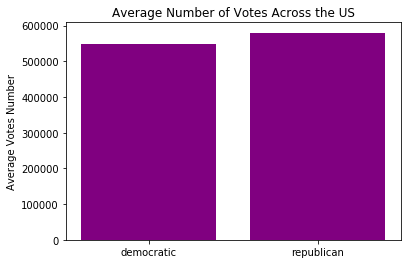

In [50]:
bar1 =(pd.to_numeric(rate['democratic']).mean())
bar2 =(pd.to_numeric(rate['republican']).mean())
plt.bar([0,1],[bar1,bar2],align='center',color = 'purple')
plt.title('Average Number of Votes Across the US')
plt.xticks([0,1],['democratic', 'republican'])
plt.ylabel('Average Votes Number')
plt.show()


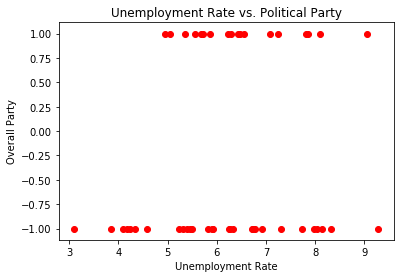

In [49]:
plt.scatter(rate['unemployment'],rate['overallparty'],color='red') #Colored by species

plt.title('Unemployment Rate vs. Political Party')
plt.xlabel('Unemployment Rate')
plt.ylabel('Overall Party')

plt.show()

In [60]:
#to see cool map visualization, please install plotly in terminal: pip install cufflinks plotly

import plotly.graph_objects as go

# Load data frame and tidy it.
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = rate['overallparty'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Party",
))

fig.update_layout(
    title_text = 'Spread of Political Parties',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

#IF VISUALIZATION IS NOT SHOWING, HERE IS A SCREENSHOT: 
#https://drive.google.com/file/d/1wrkOmTlZFHeK_gekANOLFrcYIjyc4Zos/view?usp=sharing

# Machine Learning Models

# Linear Regression

In [16]:

#slicing percentages in column "White" and converting into floats 
for i in range(len(facts["White"])):
    facts["White"][i] = facts["White"][i][:-1]
    facts["White"][i] = float(facts["White"][i])


facts.head()




,State,Hispanic,White,Black,Asian,American Indian
0,Alabama,4.10%,65.5,26.70%,1.30%,0.50%
1,Arizona,31.40%,54.7,4.10%,3.20%,3.90%
2,Arkansas,7.40%,72.3,15.20%,1.60%,0.60%
3,California,39.10%,37,5.50%,14.40%,0.40%
4,Colorado,21.50%,68.2,3.90%,3.10%,0.60%


In [42]:
# seperate your X (features) and your Y (target)
features1 = facts[["White"]]
target1 = rate["unemployment"]

# train test split your data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(features1, target1, test_size=0.2, random_state=20)

#using linear regression model
party_model = LinearRegression()

#fit model using train data
party_model.fit(x_train, y_train)

# store the predictions for the test sets
party_predictions = party_model.predict(x_test)

#mean square error
party_MSE = mean_squared_error(party_predictions,y_test)
print("party MSE:", party_MSE)

print(party_predictions)
print(y_test)

party MSE: 2.7813529546341487
[6.19178187 5.73409864 5.724149   5.40244412 6.63951547 6.51348675
 5.94635753 5.93640789 7.06403325 6.36424222]
Colorado          5.358946
Idaho             6.319992
South Dakota      4.097629
West Virginia     8.104809
Arizona           9.274588
Louisiana         7.812949
Oregon            7.849271
Kansas            4.178851
Texas             5.894519
North Carolina    6.708099
Name: unemployment, dtype: float64


# Decision Tree

In [39]:
model=tree.DecisionTreeClassifier(max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(rate[['unemployment']],rate['overallparty'],test_size=0.33)

y_train=y_train.astype('float')
y_test = y_test.astype('float')
model.fit(X_train,y_train)

dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(y_test,dtree_pred_test))


Train Accuracy:  0.7419354838709677
Test Accuracy:  0.6875


# Write Up

## Methodologies:

Our question is: does the unemployment rate of a certain US state have any effect on the 2016 US presidential election results? 

The datasets that we have only include the unemployment rates of each state’s individual counties, as well as the number of votes for a particular candidate for each county. Therefore, we needed to create a dataframe that included the unemployment rates and number of votes for each political party for each state, rather than county. 
Creating dataframe for each state’s average unemployment rate: We did this by creating a dictionary labelled “unemployment_rate” that includes the average unemployment rates for each state.  We calculated this average unemployment rate by creating a seperate dictionary titled “dictionary” and used a for loop to sum up all of the unemployment rates for each county within a state. We divided the unemployment rate sums in “dictionary” by the number of counties within each state, which was calculated in another 3rd dictionary titled “states.” We then converted the unemployment_rate dictionary into a dataframe titled “rate.”  

Creating dataframe for each state’s political party affiliation: Our other dataset for the 2016 US elections included the number of votes each candidate got for an individual county and each candidate’s affiliated party. We created a dictionary titled “democratic” that summed up all the votes for a democratic candidate within each state. We also created a separate dictionary titled “republican” that summed up all the votes for a republican candidate within each state. After converting and transposing these dictionaries to dataframes, we appended “democratic” and “republican” to the original dataframe that includes the unemployment rate. 
Additional pre-processing: We also created separate columns that calculated the overall party affiliation by comparing if there were more votes for the democratic candidates and republican candidates. This comparison was done using a for loop that compares the number of democratic and republican votes. In rate[“overallparty”] the ‘1’s stand for an overall democratic state and the ‘-1’s stand for an overall republican state.  


# Inferences

## Visualizations: 


Bar Graph: The motivation for this visualization was to see the number of votes for each political party averaged across the US states. From this visualization, we can observe that the overall average number of votes for the democratic party is approximately 550,000 and the average number of votes for the republican party is approximately 580,000. This visualization reveals that the number of votes between the democratic party and republican party is roughly close, although the republican party on average received more votes (~30,000) based on each state. 

Scatter Plot: In the scatter plot, our main goal was to visualize the relationship between the unemployment rate and the party affiliation for each state. We labelled the “democratic” party on the y-axis as 1 and the “republican” party on the y-axis as -1. The scatterplot shows that the unemployment rates for the states that voted for the republican party were relatively spread out across the range of the unemployment rate. However, the scatter plot reveals that the democratic states have higher unemployment rates, as there is more clustering of the states near unemployment rates that are higher (ie. 6.5). This makes sense because democratic candidates tend form their policies in relative favor for individuals who might not be very wealthy, while the republican candidates are typically known for having policies in favor of bigger businesses and wealthier individuals. This is also represented in our scatterplot, as the states with lower unemployment rates (ie. 3 and 4) were all overall republican. 

US Map: By using US Map, we want to visualize how the location of each state might be related to the affiliated political parties. The no-color states on the map mean that these states’ data is missing. Red represents Democratic, and a paler pink color represents Republican. When we put the mouse on a specific state, it will show the abbreviation of this state’s name and which party it supports(1 is Democratic, -1 is Republican). This Map visualization reveals that there are more “Republican” states than “Democratic” states in the US for the 2016 elections. This map also shows that states near the mid-west tended to vote more for the democratic party (ie. Ohio, Indiana, Tennessee), while the states on the east coast (ie Massachusetts, Virgina, North Carolina) tended to vote more on the republican party. 


## Machine Learning Models

Linear regression model: 
For this model, we intend to find the overall relationship between percentage of white population and unemployment rate. It shows that there is a negative relationship (coefficient is -0.03316545), which means that from the data we have, the result shows that if there is a larger population of white people, there is a lower unemployment rate in this state. However, it is not a very strong relationship because the absolute value of coefficient is far away from 1. Therefore, we cannot just use white population fraction to predict unemployment rate through linear regression model. Moreover, we calculate the mean square error for our model. It’s approximately 2.78, which is a little bit high. This number means that our model does not fit our data perfectly, and we can find better models in the future study when we learn more models. When we find a better model, we could use this model to predict the unemployment rate in a specific state and provide an advanced view for governors. Thus, they are able to take action earlier and faster, providing a better environment for every race.  

DecisionTreeClassifier: 
For this classification model, we want to use each state’s unemployment rate to predict which overall party this state will be in. We try to change the max_depth for our decision tree.When we increase the max_depth, the train score will increase. When we decrease the max_depth, the test accuracy will increase a little bit. Max_depth of 5 works best for us since higher train accuracy may mean overfitting. Our train accuracy is nearly 0.71, which is close to 1. This means that our decision tree model fits the training data well and could classify most data in the training package. At the same time, we calculate the test accuracy to see if our DecisionTreeClassifier could apply to more data and be used in other situations. Everytime we run the DecisionTreeClassifier, it will give different test accuracy. The least one is nearly 0.4 and the largest one is nearly 0.7. It depends on how the model DecisionTreeClassifier is trained (different conditions to make the decision). We can use this model to predict which party would the state support according to its unemployment rate. It is useful for candidates in the election.
